In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_glassdoor_data.csv")

In [3]:
# lets look at the first 5 rows of the dataset
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salart,company_text,job_state,same_state,age,python,rstudio,spark,excel,aws
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,48,1,0,0,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,37,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,11,1,0,1,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,56,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,23,1,0,0,1,0


In [4]:
# lets look at the columns name to get a better grasp of the dataset
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salart',
       'company_text', 'job_state', 'same_state', 'age', 'python', 'rstudio',
       'spark', 'excel ', 'aws'],
      dtype='object')

In [7]:
# lets look at the different job titles.
df['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

In [9]:
# as it can be observed from above that there are many different type of job title for simplification we will try
# to simplify it into few categories.

def simplify_job_title(jobTitle):
    if "data scientist" in jobTitle.lower():
        return 'data scientist'
    elif "data engineer" in jobTitle.lower():
        return 'data engineer'
    elif "analyst" in jobTitle.lower():
        return 'data analyst'
    elif "manager" in jobTitle.lower():
        return 'manager'
    elif "director" in jobTitle.lower():
        return 'director'
    elif "machine learning" in jobTitle.lower():
        return 'machine learning'
    else:
        return 'na'

# it would really be helpfull if we also seperate the senior and junior jobs
def jobSeniority(jobTitle):
    if 'sr' in jobTitle.lower() or 'senior' in jobTitle.lower() or 'lead' in jobTitle.lower() or 'principal' in jobTitle.lower():
        return 'senior'
    elif 'jr' in jobTitle.lower() or 'jr.' in jobTitle.lower():
        return 'jr'
    else:
        return 'na'


In [10]:
df['job_simplified'] = df['Job Title'].apply(simplify_job_title)
df['seniority'] = df['Job Title'].apply(jobSeniority)



In [11]:
# lets check it out
df['job_simplified'].value_counts()

data scientist      279
na                  184
data engineer       119
data analyst        102
manager              22
machine learning     22
director             14
Name: job_simplified, dtype: int64

In [13]:
df['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [14]:
# hmm now it looks good, instead of having numerous job titles, having few can be good fo further analysis.

In [16]:
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [17]:
# as you can see there is Los Angeles in the dataframe, lets fix it
df['job_state'] = df['job_state'].apply(lambda k: k.strip() if k.strip().lower() != 'los angeles' else "CA")
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [18]:
# I have started this analysis and it might seem intimidating or how do I know what column to check or will be valueable, that
# is becuase I have gone through the dataset thoroughly and I know what questions to ask, or what column will be beneficial. So
# Please do go through the dataset atleast one time.


In [19]:
# Now we want to look at number of competitors a company have
df['num_competitors'] = df['Competitors'].apply(lambda x: len(x.split(', ')) if x !='-1' else 0)
df.num_competitors

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_competitors, Length: 742, dtype: int64

In [20]:
# there is an hourly column in our dataframe lets convert those salary values to annual values.
# to convert we know to convert hourly salary to annual just multiply it with 2000, in hour case hour data is already in annual
# we will only multiply min max salary with 2

df['max_salary'] = df.apply(lambda k: k.max_salary * 2 if k.hourly == 1 else k.max_salary, axis=1)
df['min_salary'] = df.apply(lambda k: k.min_salary * 2 if k.hourly == 1 else k.min_salary, axis=1)

In [22]:
df[df['hourly'] == 1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [25]:
df['company_text']

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: company_text, Length: 742, dtype: object

In [26]:
# lets remove the newline syntax from the company_text column
df.company_text = df.company_text.apply(lambda k: k.replace('\n', ''))
df.company_text

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_text, Length: 742, dtype: object

In [27]:
# now lets do some data analysis
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salart,same_state,age,python,rstudio,spark,excel,aws,num_competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,0.002695,0.225067,0.522911,0.237197,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.051882,0.417908,0.499812,0.425651,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


### Lets do simple EDA
`Note! This project is not mainly focused on EDA but rather on making a model for prediction and productionize it, so we will not do a thorough analysis`

<AxesSubplot:>

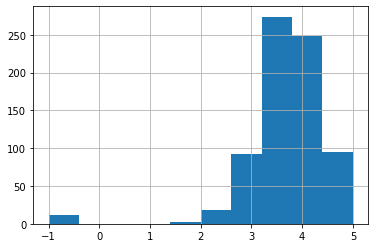

In [28]:
df.Rating.hist()

<AxesSubplot:>

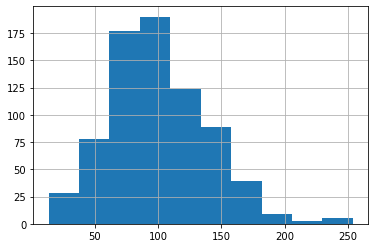

In [30]:
df.avg_salart.hist()

<AxesSubplot:>

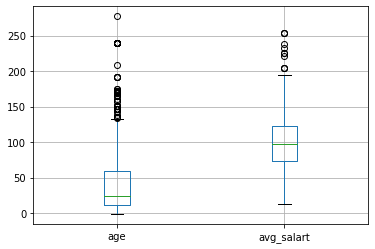

In [31]:
df.boxplot(column=['age', 'avg_salart'])

In [32]:
# it seems that we have some outlier in our dataset.

In [34]:
df[['age', 'Rating', 'avg_salart']].corr()

,age,Rating,avg_salart
age,1.000000,0.023162,0.019574
Rating,0.023162,1.000000,0.013492
avg_salart,0.019574,0.013492,1.000000


In [35]:
# this is the correlation between each columns, it basically shows how one column is related to other, high corelation means
# that if one column increases other increases and vice versa

<AxesSubplot:>

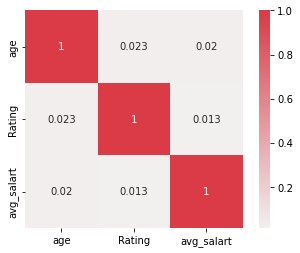

In [57]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age', 'Rating', 'avg_salart']].corr(), cmap=cmap, annot=True, square=True, center=0)

D:\anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


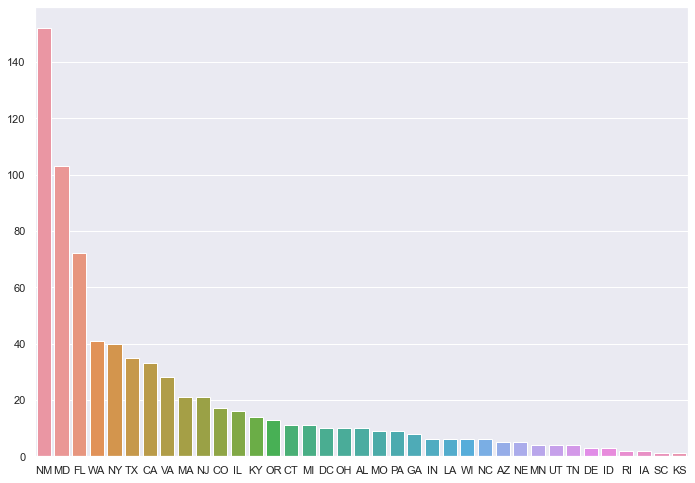

In [80]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(df.job_state.unique(), df.job_state.value_counts().to_numpy())
plt.show()

In [81]:
# from above graph it can be observed that state New Mexico(NM) have the most job openings followed by Maryland and so on.

Bar plot for Size, total categories = 9


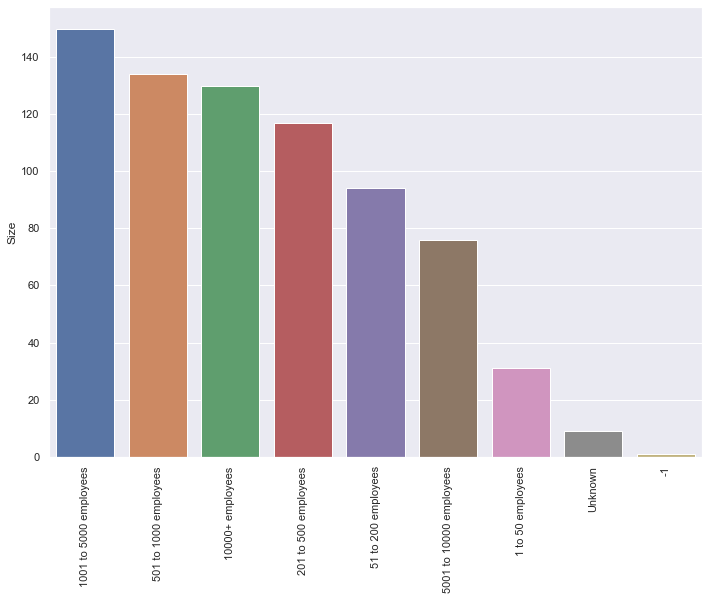

Bar plot for Type of ownership, total categories = 11


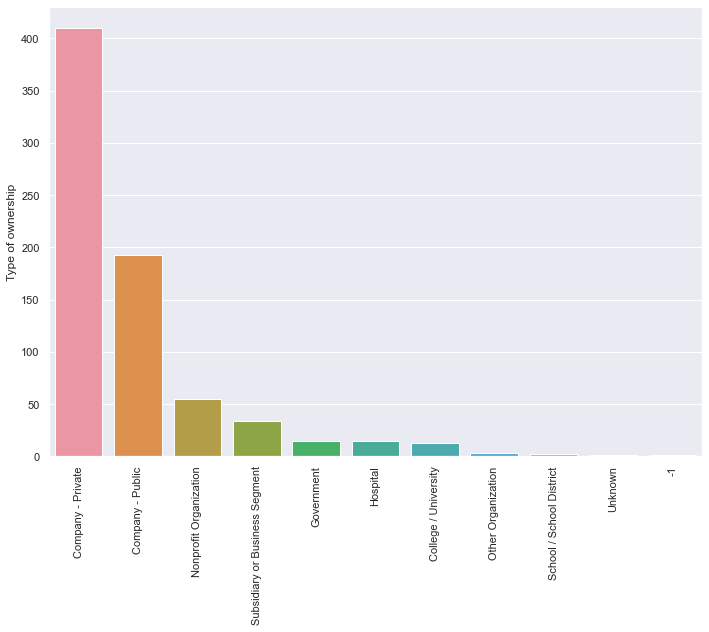

Bar plot for Sector, total categories = 25


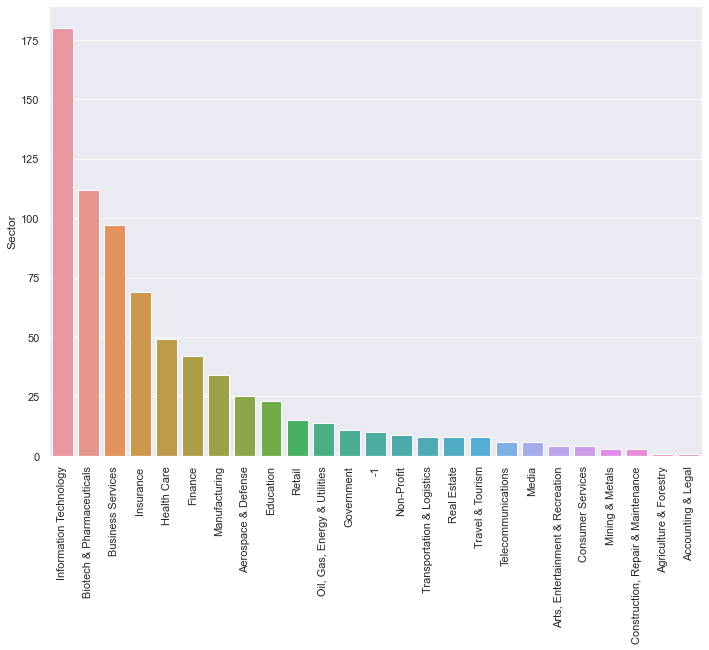

Bar plot for Revenue, total categories = 14


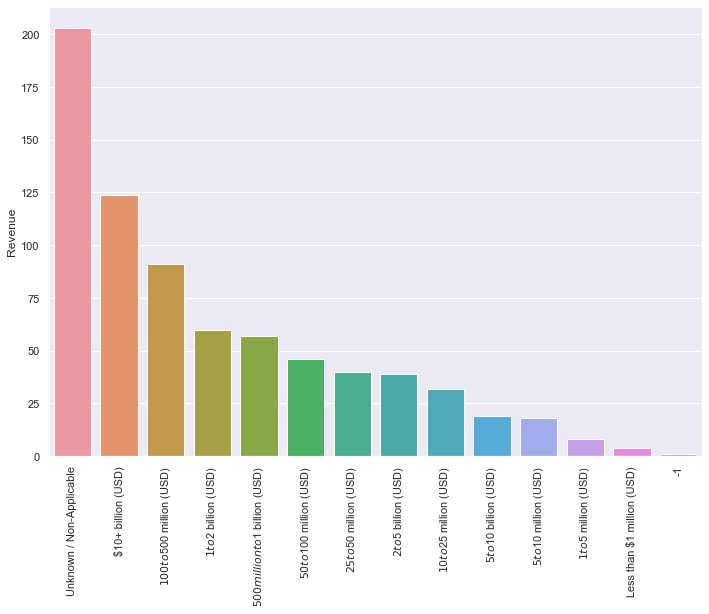

Bar plot for job_state, total categories = 37


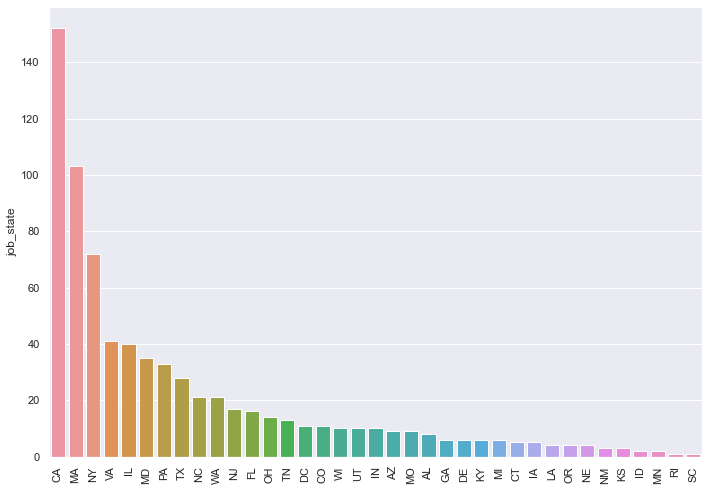

Bar plot for job_simplified, total categories = 7


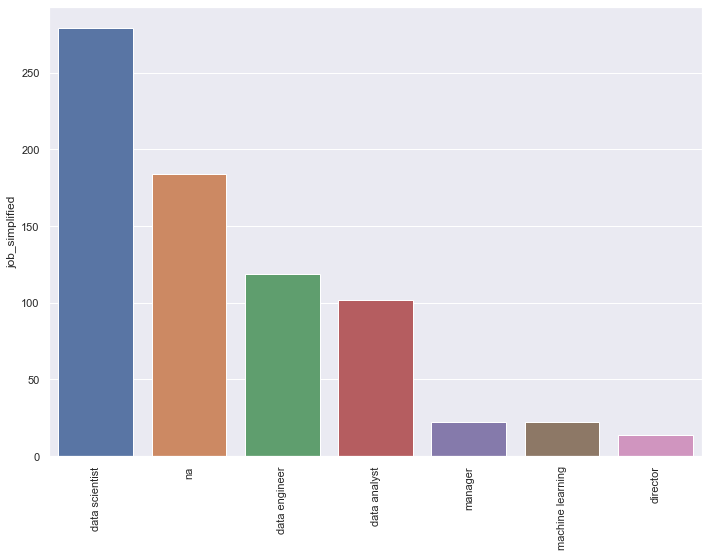

Bar plot for seniority, total categories = 3


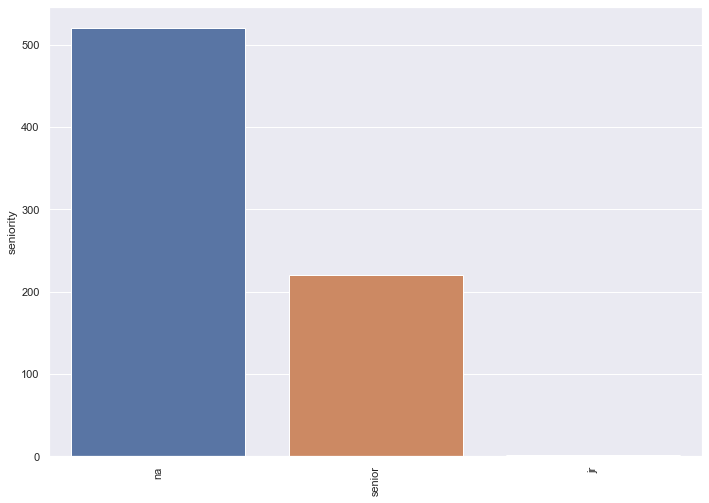

In [88]:
# now lets look at the categorical data, and see what it have in store for us.
# to do so we will loop over all categortical dataset and make bar plot of each attribute. we are ignoring all the attributes with more than 50 categories for now.

for col in df.select_dtypes(include='object').columns:
    val = df[col].value_counts()
    if len(val) < 50:
        print("Bar plot for {}, total categories = {}".format(col, len(val)))
        sns.barplot(x=val.index, y=val)
        plt.xticks(rotation=90)
        plt.show()

In [90]:
# let look at the average salary of the different categories job
pd.pivot_table(df, index='job_simplified', values='avg_salart')

,avg_salart
job_simplified,
data analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
machine learning,126.431818
manager,84.022727
na,84.853261


In [91]:
# lets just add the seniority to this and see what infromation it conveys
pd.pivot_table(df, index=['job_simplified', 'seniority'], values='avg_salart')

avg_salart
job_simplified   seniority            
data analyst     jr          56.500000
                 na          61.155405
                 senior      79.092593
data engineer    na          96.701220
                 senior     124.689189
data scientist   jr         106.500000
                 na         107.043011
                 senior     138.956522
director         na         168.607143
machine learning na         119.133333
                 senior     142.071429
manager          na          84.022727
na               na          73.988189
                 senior     109.061404

In [95]:
# lets now look at avg salary at each sate
pd.pivot_table(df, index='job_state', values='avg_salart').sort_values('avg_salart', ascending=False)

,avg_salart
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [96]:
# to go into more depth, lets look at each job avg salary in each state.
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index=['job_state', 'job_simplified'], values='avg_salart').sort_values('job_state', ascending=False)

avg_salart
job_state job_simplified              
WI        na                 54.000000
          data scientist    113.500000
          data analyst       58.833333
WA        na                 97.500000
          data scientist     99.764706
          data analyst       54.500000
VA        na                 79.300000
          machine learning   87.000000
          data scientist    108.416667
          data engineer      96.900000
          data analyst       71.583333
UT        data engineer     100.333333
          data analyst       54.750000
          data scientist    140.500000
TX        na                 41.285714
          data scientist    100.730769
          data engineer     113.062500
TN        data scientist     96.000000
          data engineer     100.950000
          data analyst       13.500000
SC        na                 60.500000
RI        data analyst      100.000000
PA        machine learning  120.500000
          data engineer      91.500000
          data scientist    113.333333
          data analyst       62.750000
          manager           109.666667
          na                 76.062500
OR        data scientist     98.500000
          data engineer      73.000000
OH        na                 91.166667
          data scientist    105.285714
          data analyst       53.875000
NY        na                 81.583333
          machine learning  125.000000
          data scientist    115.250000
          data engineer      86.375000
          data analyst       65.607143
NM        data scientist     74.333333
NJ        data scientist    106.875000
          data analyst       83.583333
          data engineer     112.000000
          manager           109.500000
          director          161.500000
          na                 82.500000
NE        na                 41.000000
NC        na                 90.916667
          data scientist    117.000000
          data engineer     104.250000
MO        na                 72.333333
          manager            40.500000
          data scientist    127.666667
          data analyst       61.000000
MN        data engineer      95.000000
          data analyst       76.000000
MI        manager            87.500000
          data scientist    106.625000
MD        na                 88.750000
          data scientist    109.115385
          data engineer     109.000000
          data analyst       80.666667
MA        na                107.478261
          manager            71.900000
          director          117.833333
          data scientist    113.750000
          data engineer     107.291667
          data analyst       59.125000
LA        data analyst       48.000000
          data engineer      70.500000
          na                 20.000000
KY        na                103.500000
          data scientist     84.000000
KS        machine learning   87.000000
IN        na                 69.000000
          data scientist     84.500000
          data engineer     114.500000
IL        data analyst       66.500000
          na                 57.166667
          machine learning  133.000000
          director          221.750000
          data scientist    117.233333
          data engineer      96.125000
ID        data analyst       56.250000
IA        data analyst       43.000000
          data engineer     102.833333
GA        data scientist     81.333333
          na                 80.000000
FL        data scientist     97.357143
          data engineer      91.833333
          data analyst       47.500000
DE        na                 27.500000
DC        data scientist    149.000000
          data engineer      85.000000
          data analyst       63.500000
CT        na                 62.500000
          data scientist     84.000000
CO        machine learning  100.500000
          data engineer      99.000000
          data analyst       29.500000
          na                 31.500000
          data scientist    108.666667
CA        n

In [97]:
# now lets look at how many jobs are there for each category in each state
pd.pivot_table(df, index=['job_state', 'job_simplified'], values='avg_salart', aggfunc='count').sort_values('job_state', ascending=False)

avg_salart
job_state job_simplified              
WI        na                         4
          data scientist             3
          data analyst               3
WA        na                         1
          data scientist            17
          data analyst               3
VA        na                         5
          machine learning           2
          data scientist            18
          data engineer             10
          data analyst               6
UT        data engineer              3
          data analyst               4
          data scientist             3
TX        na                         7
          data scientist            13
          data engineer              8
TN        data scientist             1
          data engineer             10
          data analyst               2
SC        na                         1
RI        data analyst               1
PA        machine learning           7
          data engineer              1
          data scientist             6
          data analyst               8
          manager                    3
          na                         8
OR        data scientist             3
          data engineer              1
OH        na                         3
          data scientist             7
          data analyst               4
NY        na                        12
          machine learning           2
          data scientist            40
          data engineer              4
          data analyst              14
NM        data scientist             3
NJ        data scientist             4
          data analyst               6
          data engineer              2
          manager                    2
          director                   2
          na                         1
NE        na                         4
NC        na                        12
          data scientist             3
          data engineer              6
MO        na                         3
          manager                    1
          data scientist             3
          data analyst               2
MN        data engineer              1
          data analyst               1
MI        manager                    2
          data scientist             4
MD        na                        16
          data scientist            13
          data engineer              3
          data analyst               3
MA        na                        46
          manager                    5
          director                   6
          data scientist            30
          data engineer             12
          data analyst               4
LA        data analyst               1
          data engineer              2
          na                         1
KY        na                         4
          data scientist             2
KS        machine learning           3
IN        na                         4
          data scientist             2
          data engineer              4
IL        data analyst               3
          na                         6
          machine learning           2
          director                   6
          data scientist            15
          data engineer              8
ID        data analyst               2
IA        data analyst               2
          data engineer              3
GA        data scientist             3
          na                         3
FL        data scientist             7
          data engineer              3
          data analyst               6
DE        na                         6
DC        data scientist             5
          data engineer              4
          data analyst               2
CT        na                         3
          data scientist             2
CO        machine learning           1
          data engineer              3
          data analyst               1
          na                         3
          data scientist             3
CA        n

In [98]:
# from above you can get very much information, such as California (CA) have 68 job opening for data scientist and jobs in CA have 
# higher avg salary, compared to other states, also the salary of datascientist in CA is 142K dollars a year.

In [102]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# if word_tokenize gives error please uncomment below 2 lines
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [114]:
def remove_punctuations(text):
    cleaned_txt = []
    word_tokens = word_tokenize(text)
    for word in word_tokens:
        if word not in set(stopwords.words('english')) and word.isalpha():
            cleaned_txt.append(word.lower())
            
    return cleaned_txt

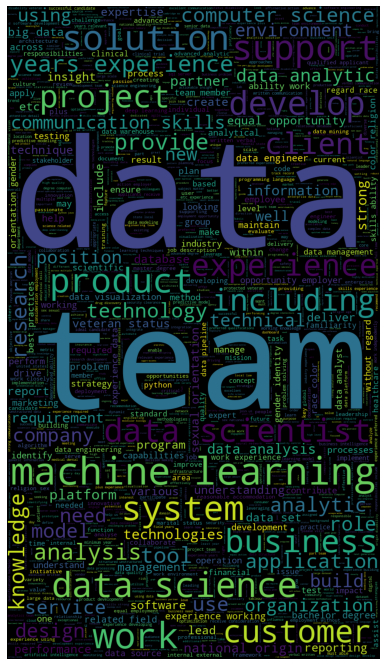

In [116]:
words = " ".join(df['Job Description'])
cleaned_words = remove_punctuations(words)

cleaned_text = " ".join([word for word in cleaned_words])
wc = WordCloud(stopwords=STOPWORDS, max_words=2000, width=800, height=1400)
wc.generate(cleaned_text)

plt.figure(figsize=(10, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()